<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/4_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Логистическая регрессия


## Теоритическая часть

какие задачи могут решаться. В общем случае на вход данные, на выходе решение

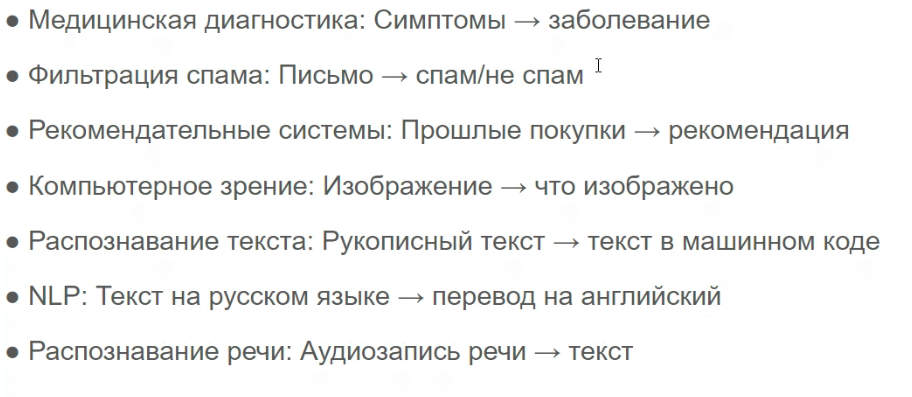

Если взять одномерные данные (Х, У), где Х - фича, У - предсказание, то получится модель линейной регрессии

В случае классификации задача менятся: на основе выборки пытаемся разделить различные классы кривой, т.е задача сводится уже не к нахождению суммы квадратов от этой кривой, а к нахожденю кривой, которая будет разделять наши классы лучшим образом

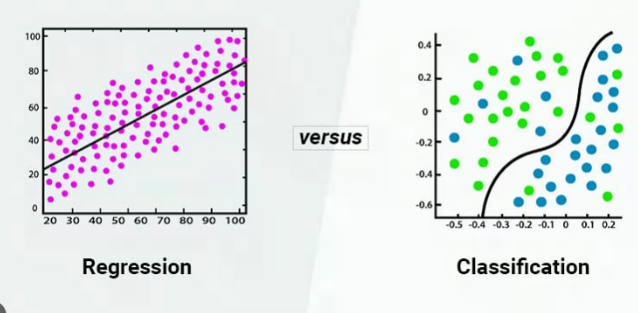

Рассмотрим задачу 

В предыдущей задаче для линейной регрессии была функция: 

            Y = B_0 + B_1 * X  

рассматривались B_0, B_1, чтобы сделать пресказания

В случае логистической регресии считаем, что есть 2 класса: 0 и 1
и будем считать, что эта функция будет уже говорить нам о том насколько наш объект находится от баз-лайна. Если У=0, то считаем, что О принадлежит не тому и не другому классу, У=-100 – предпочтение 0-классу, У =1000 – 1-классу
 Для чего это? рассмотрим график 


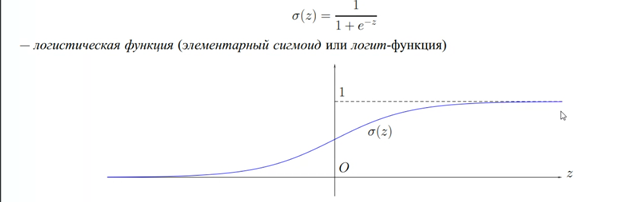

можем перевести предсказание в более осмысленное русло

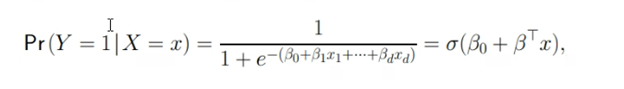

Если мы хотим увидеть вероятность, что объект относится  к 1-му классу
 Какая производна мб у сигмоиды?


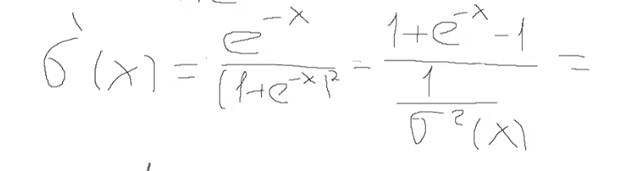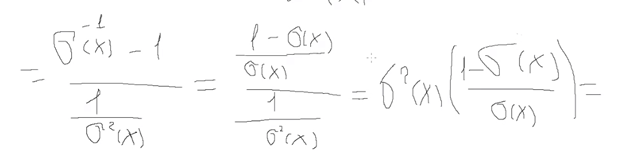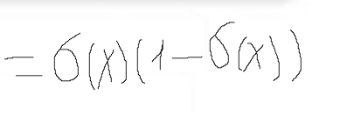

Получается, что производная выражается через сигмоиду – т.е мож ем вычислить, если знаем саму сигмоиду

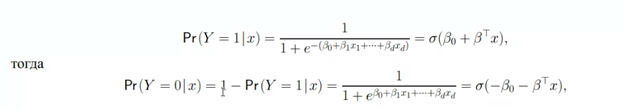

тут формула, для нулевого класса

Пример вычисления сигмоиды 

Если у нас одна фича


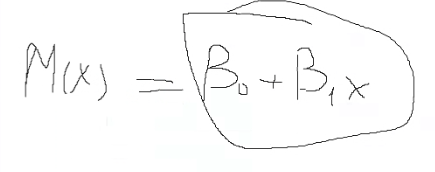

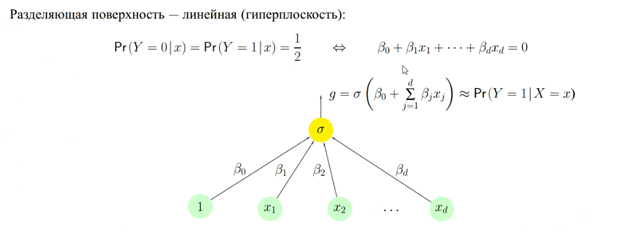

Если у нас К-классов, есть функция softmax

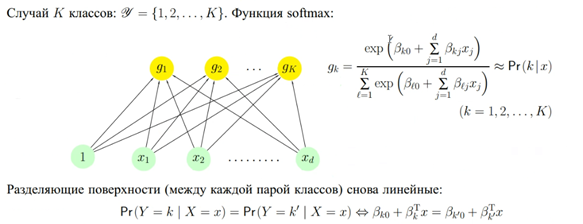

используется так же в нейросетях для оценки вероятности опр-го класса.

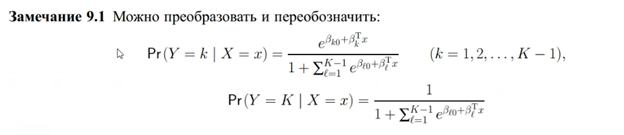

Расчет параметров

(случай, когда у нас множество классов называется cross-entropy)

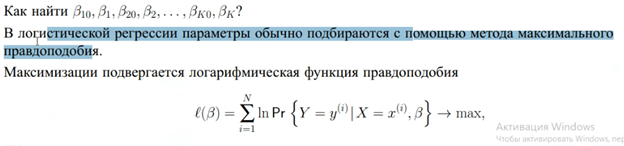

**Метод максимального правдоподобия**

пусть есть некоторая выборка и пусть некоторое распределение- возьмем распр-е Пуассона


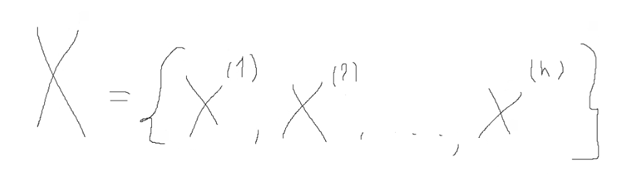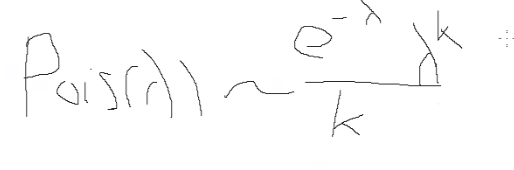

мы считаем, что выборка описывает п распр-ем и мы хотим подобрать параметр лямда чтобы макс вер-ть макс-й тогда будем считать, что с т з. ММП будет хорошей оценкой параметра

в данном случае у нас пар-р лямда, т.е выражение, которое хотим максимизировать 


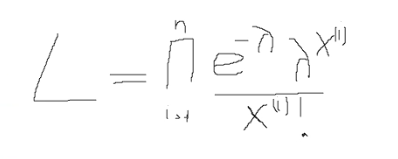

и соответственно для этого нужно каким-то образом найти точку экстремума – производная считаться будет сложно, как найти максимум (а тут еще и факториал)
Можем взять lоg от этой функции. Тогда произведение можно записать как сумму логарифмов, а максимизация исходного выражения будет как у логарифмов


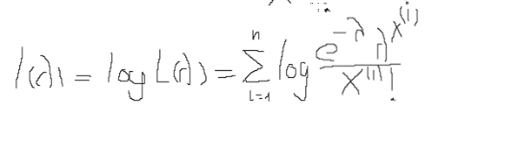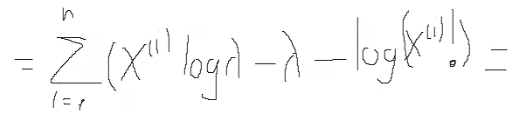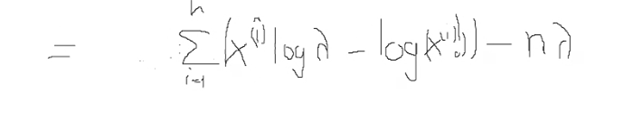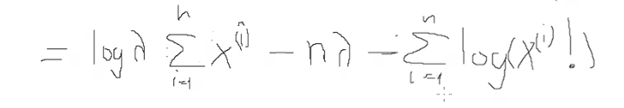

далее пишем производную по лямда  и =0

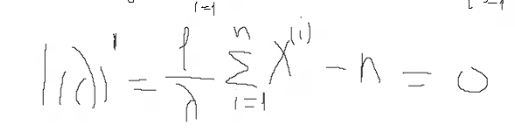

отсюда

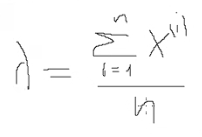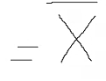

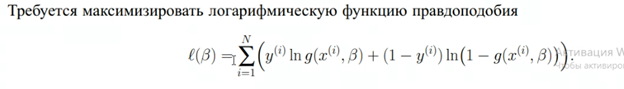

что будет

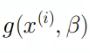 ?

это будет вероятность (сигмоида точнее)

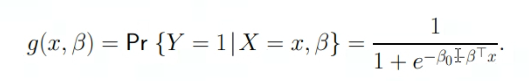

(тут для двумерного)

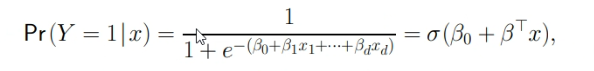

(для d-мерного)

почему у нас 2 слагаемых в формуле для l?
Если объест принадлежит нулевому классу, то Y=0 и первое слагаемое = 0, а если Y = 1, то второе слагаемое выбывает.
Найдем градиент от l, по B0 и B1 (считаем параметрами нашей регрессии) 


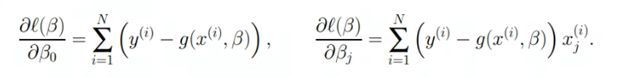

Когда у нас будет обучаться алгоритм, то мы должны будем поменять loss_grad поменять на эти выражения (см. лин. регрессию)

Посмотрим на  image.png

Мы уже знакомы с SGD Regressor, было упомянуто, что он работает на линейной регрессии, но помимо этого он может работать и на других для этого надо это указать.


## Практическая часть

Но нам в этот раз нужен LogisticRegression
будем использовать дата-сет mnist - это рукописные символы


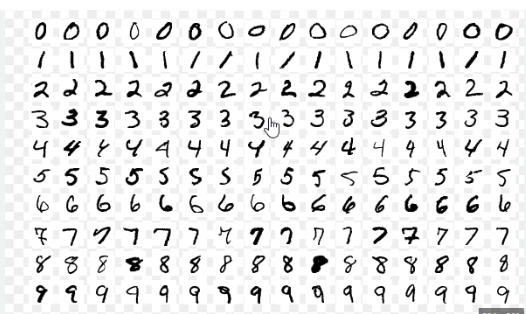

Нужно как-то распознать какая цифра изображена на картинке

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits # подключаем этот дата-сет (тут цифирки)
from sklearn.model_selection import train_test_split #добавили для сплита
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt #для графиков и картиночек

In [12]:
digits = load_digits()
type(digits) #смотрим тип

sklearn.utils._bunch.Bunch

можно загуглить - что-то типо словаря, можно обращаться через точку

In [13]:
dir(digits) 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

видим ребуты, посмотрим что там

In [14]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

просто попиксельный дада-сет

In [15]:
digits.data.shape # данные забиты в матрицу посмотрим ее размерность

(1797, 64)

1797 объектов по 64 фичи у каждого, т.е (корень из 64) изображения 8х8

In [16]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [17]:
 digits.target

array([0, 1, 2, ..., 8, 9, 8])

Можно сделать так

In [18]:
X, y = digits.data, digits.target #получили X, Y

Можно было как на сайте 

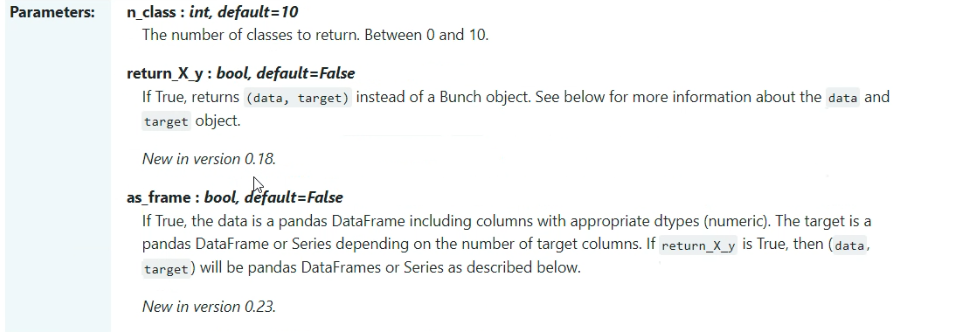

вернули бы просто (data, target), т.е.

In [19]:
X, y = load_digits(return_X_y=True)
y

array([0, 1, 2, ..., 8, 9, 8])

Видим, что получили тоже самое

тут у нас классы от 1 до 9, 

сделаем сплит нашего дата-сета

In [10]:
SEED = 17 #фиксируем сид для сплита

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

получили следующее (трейн и тест дата сеты)

In [20]:
X_train.shape

(1437, 64)

Вызовем какую-нибудь цифру(картинку) из нашего дата-сета 

<Figure size 432x288 with 0 Axes>

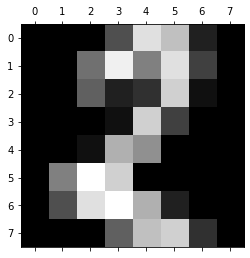

In [21]:
plt.gray()
plt.matshow(digits.images[50])
plt.show()

КРАСИВОЕ

попробуем обучить нашу модель, для этого создадим Лог-ю регреессию (LogisticRegression) и делаем fit, передаем тренировочные параметры.



In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Выскочило что-то страшное: пишут, что не сходиться наша модель (TOTAL NO. of ITERATIONS REACHED LIMIT.), т.е. достигли предела по итерациям

Посмотрим, что получилось, даже если алгоритм не сошелся


тут делаем импорт: 



```
from sklearn.metrics import accuracy_score
```
(см в поле импортов)


In [23]:
y_prediction = logreg.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.9666666666666667

получется accuracy довольно высокое, с веротностью 96,7% правильно предскажем цифру

Хотим посмотреть на сходящемся алгориме

In [26]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
y_prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.9611111111111111

accuracy стал меньше, мб переобучились

тут есть penalty - он штрафует за переобучение - посморим, если его отключть

In [30]:
logreg = LogisticRegression(penalty = None, max_iter=100)
logreg.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [31]:
y_prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
accuracy

0.9527777777777777

95% - вроде неплохо. Интересно, что при отключении penalty все сходится - это потому, что немного изменяется формула подсчета градиента

у модели лог-й регресии есть разные алгоритмы нахождения оптимума: стандартно используется lbfgs, посмотрим на 'liblinear'

In [32]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

y_prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)

In [33]:
accuracy

0.9611111111111111

Если полазить по сайту скленинга, то увидим, что тут используется cross-entropy (просто для справки)

Попробуем в пейнте нарисовать картинку и отправить модель( картинка будет 8 * 8 пикселей)

используем библиотеку open cv для прочтения картинки

In [34]:
import cv2 

In [100]:
seven = cv2.imread('./seven.png')

смотрим размерность

In [101]:
seven.shape

(8, 8, 3)

смотрим тип ( np array)

In [103]:
type(seven)

numpy.ndarray

надо конвертировать изображение

In [102]:
seven_gray = cv2.cvtColor(seven, cv2.COLOR_BGR2GRAY)

In [104]:
seven_gray.shape

(8, 8)

четко, избавились от "3"

посмотрим что там сделали

<Figure size 432x288 with 0 Axes>

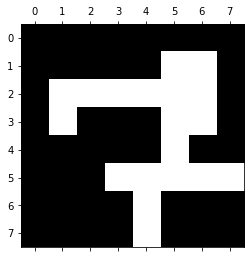

In [105]:
plt.gray()
plt.matshow(seven_gray)
plt.show()

вроде похоже, но у нас больно четкое изображение, сделаем reshape


In [106]:
seven_features = seven_gray.reshape(1, -1)

In [107]:
seven_features.shape 

(1, 64)

используем нашу модель

In [108]:
logreg.predict(seven_features)

array([4])

получили 4, хе, попробуем другую картинку


<Figure size 432x288 with 0 Axes>

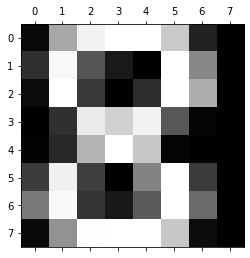

In [58]:
eight = cv2.imread('./eight.png')
eight_gray = cv2.cvtColor(eight, cv2.COLOR_BGR2GRAY)
eight_gray.shape
plt.gray()
plt.matshow(eight_gray)
plt.show()

In [59]:
eight_features = eight_gray.reshape(1, -1)
eight_features.shape 
logreg.predict(eight_features)

array([3])

ну либо я плохой художник, либо наша модель не так хороша, но она тут поняла "3"

Пробуем 6

<Figure size 432x288 with 0 Axes>

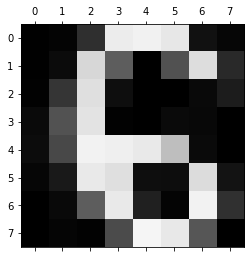

array([6])

In [76]:
six = cv2.imread('./six.png')
six_gray = cv2.cvtColor(six, cv2.COLOR_BGR2GRAY)
six_gray.shape
plt.gray()
plt.matshow(six)
plt.show()
six_features = six_gray.reshape(1, -1)
six_features.shape 
logreg.predict(six_features)

приложив несколько усилий, я смог добиться узнаваемой 6

посмотрим коэфициенты

In [77]:
logreg.coef_.shape

(10, 64)

их 10 на 64 будет сложно что-то сказать, посмотрим для 6

In [78]:
logreg.coef_[6].argmax()

42

In [79]:
logreg.coef_[6].argmax()//8

5

artmax - возращает индекс макс-го элимента 

42, пятая строчка 2 пиксель - имеет такой вес

можно поиграться с картинками и посмотреть как модель их обработает, из своего небольшого опыта могу сказать: несколько попыток рисования шестерки так, чтобы ее узнали дали следующие выводы:


1.   картинка дожна быть по центру или немного смещенной вправо
2.   нужно размытие - слишком четкие картинки не понимаются



<Figure size 432x288 with 0 Axes>

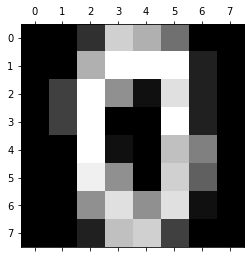

In [81]:
plt.gray()
plt.matshow(digits.images[20])
plt.show()

Сделаем хит-маб для 6

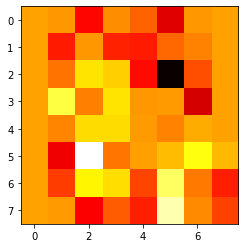

In [82]:
plt.imshow(logreg.coef_[6].reshape(8, 8), cmap='hot', interpolation='nearest')
plt.show()

черный - говорит, что тут есть пиксель

белый - что за этот пиксель штрафуем довольно сильно

Посмотрим на вероятности

In [84]:
logreg.predict_proba(six_features)

array([[4.92566207e-138, 2.92947210e-124, 7.09713223e-097,
        2.16016139e-115, 4.56956641e-114, 4.05869434e-122,
        1.00000000e+000, 7.70486538e-109, 1.36965631e-014,
        4.98676941e-202]])

видно, что почти все к/ф-ты близки к 0, кроме 1 

In [110]:
logreg.predict_proba(six_features)[0].argmax()

6

у 6-го к/ф-та макс значение

In [93]:
# argsort - на вход массив [1,3,2] на выходе индексы, показывающие как должен выглядеть отсортированный массив [0,2,1] 
import numpy as np

x = np.array([3, 1, 2])
x = np.argsort(x)
print (x)

print([1,3,2][::-1]) # разворачивает массив

[1 2 0]
[2, 3, 1]


In [95]:
logreg.predict_proba(six_features).sum()

1.0

In [94]:
def print_posible_classes(logreg, features):
    proba = logreg.predict_proba(features).reshape(-1)
    indicies = np.argsort(proba)[::-1]
     

    print(proba.shape)
    for index in indicies:
        print("Вероятность цифры {digit} на изображении: {probability}".format(digit=index, probability=proba[index]))
print_posible_classes(logreg, X_test[200].reshape(1, -1))

(10,)
Вероятность цифры 6 на изображении: 0.7122984867920882
Вероятность цифры 8 на изображении: 0.286902179080067
Вероятность цифры 0 на изображении: 0.0007751106601123935
Вероятность цифры 5 на изображении: 2.3890778490603324e-05
Вероятность цифры 3 на изображении: 3.129917108864171e-07
Вероятность цифры 4 на изображении: 1.7363092207805628e-08
Вероятность цифры 1 на изображении: 1.4286061325033941e-09
Вероятность цифры 2 на изображении: 8.794217628802295e-10
Вероятность цифры 9 на изображении: 2.5836068851334913e-11
Вероятность цифры 7 на изображении: 5.745800257742344e-13


вот такую плотность вероятности получаем

в коде используется картинка шестерки из базы данных (внизу ее картинка), тк на них модель тренировалась 


<Figure size 432x288 with 0 Axes>

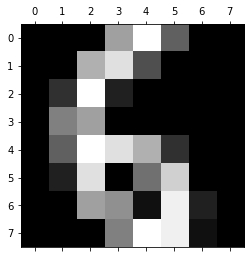

In [ ]:
plt.gray()
plt.matshow(X_test[200].reshape(8, 8))
plt.show()

In [ ]:
y_test[159]

1

тут можно искать картинки цифр и как предсказыет ее модель, потом запускаешь функцию и смотришь какие вероятности при этом рассмотривались

хочу еще на своей картинке попробывать

(10,)
Вероятность цифры 6 на изображении: 0.9999999999999863
Вероятность цифры 8 на изображении: 1.3696563109787985e-14
Вероятность цифры 2 на изображении: 7.097132225306476e-97
Вероятность цифры 7 на изображении: 7.704865383328599e-109
Вероятность цифры 4 на изображении: 4.569566407565653e-114
Вероятность цифры 3 на изображении: 2.1601613851405326e-115
Вероятность цифры 5 на изображении: 4.0586943369262866e-122
Вероятность цифры 1 на изображении: 2.9294720962431523e-124
Вероятность цифры 0 на изображении: 4.925662065287831e-138
Вероятность цифры 9 на изображении: 4.986769406536448e-202


<Figure size 432x288 with 0 Axes>

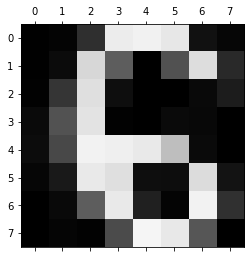

In [97]:
print_posible_classes(logreg, six_gray.reshape(1, -1))

plt.gray()
plt.matshow(six)
plt.show()

99%, что это шесть

(10,)
Вероятность цифры 8 на изображении: 0.5
Вероятность цифры 3 на изображении: 0.5
Вероятность цифры 9 на изображении: 1.4605590128467613e-93
Вероятность цифры 4 на изображении: 3.318567507860081e-186
Вероятность цифры 5 на изображении: 1.4752123509652813e-188
Вероятность цифры 2 на изображении: 1.1168035066523543e-199
Вероятность цифры 0 на изображении: 1.7398798853577935e-239
Вероятность цифры 1 на изображении: 3.640485944864471e-257
Вероятность цифры 7 на изображении: 0.0
Вероятность цифры 6 на изображении: 0.0


<Figure size 432x288 with 0 Axes>

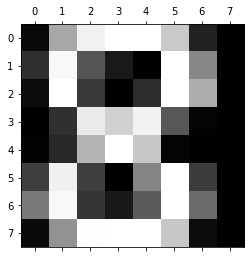

In [98]:
print_posible_classes(logreg, eight_gray.reshape(1, -1))

plt.gray()
plt.matshow(eight)
plt.show()

(10,)
Вероятность цифры 8 на изображении: 0.466939832238658
Вероятность цифры 4 на изображении: 0.466939832238658
Вероятность цифры 1 на изображении: 0.06612033552268393
Вероятность цифры 0 на изображении: 4.237869536949383e-38
Вероятность цифры 9 на изображении: 2.538930594034975e-102
Вероятность цифры 2 на изображении: 5.151939355242923e-119
Вероятность цифры 7 на изображении: 4.270595282161926e-185
Вероятность цифры 3 на изображении: 2.951758726798062e-189
Вероятность цифры 6 на изображении: 3.7541480291611e-235
Вероятность цифры 5 на изображении: 0.0


<Figure size 432x288 with 0 Axes>

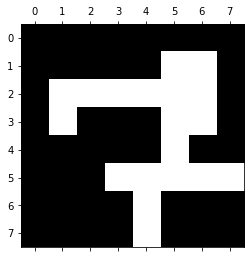

In [109]:
print_posible_classes(logreg, seven_gray.reshape(1, -1))

plt.gray()
plt.matshow(seven)
plt.show()